In [1]:
import random
random.seed(14747471)

In [2]:
# Let's import some packages we'll need.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn import tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import autograd.numpy as np
from autograd import grad
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
import copy
import autograd.numpy.random as npr
from autograd import grad,elementwise_grad
import scipy.optimize
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Perceptron
import torch
from plot_lib import set_default, plot_data, plot_model, set_default
from matplotlib import pyplot as plt
import random
import torch
from torch import nn, optim
import math
from IPython import display
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from typing import Tuple
from sklearn.linear_model import SGDClassifier 
from sklearn.calibration import CalibratedClassifierCV
set_default()

In [3]:
data = pd.read_csv('musicData.csv')
print(data.shape)
data.dropna(inplace=True)
print(data.shape)
data1=data[['instance_id','popularity','acousticness','danceability','duration_ms','energy','instrumentalness','key','liveness','loudness','mode','speechiness','tempo','valence','music_genre']]
print(data1.shape)
data1.iloc[:,7]= data1.iloc[:,7].replace(['A','A#','B','B#','C','C#','D','D#','E','E#','F','F#','G','G#'], [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5])
data1.iloc[:,10]= data1.iloc[:,10].replace(['Minor','Major'], [0,1])
data1.iloc[:,14]= data1.iloc[:,14].replace(['Electronic','Anime','Jazz','Alternative','Country','Rap','Blues','Rock','Classical','Hip-Hop'], [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0])
print(data1.head())
data1.dtypes

(50005, 18)
(50000, 18)
(50000, 15)
   instance_id  popularity  acousticness  danceability  duration_ms  energy  \
0      32894.0        27.0       0.00468         0.652         -1.0   0.941   
1      46652.0        31.0       0.01270         0.622     218293.0   0.890   
2      30097.0        28.0       0.00306         0.620     215613.0   0.755   
3      62177.0        34.0       0.02540         0.774     166875.0   0.700   
4      24907.0        32.0       0.00465         0.638     222369.0   0.587   

   instrumentalness  key  liveness  loudness  mode  speechiness  \
0           0.79200  0.5     0.115    -5.201     0       0.0748   
1           0.95000  3.0     0.124    -7.043     0       0.0300   
2           0.01180  6.5     0.534    -4.617     1       0.0345   
3           0.00253  2.5     0.157    -4.498     1       0.2390   
4           0.90900  5.5     0.157    -6.266     1       0.0413   

                tempo  valence  music_genre  
0             100.889    0.759          

D:\Aconda\envs\Lab1\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


instance_id         float64
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo                object
valence             float64
music_genre         float64
dtype: object

In [4]:
#data1.iloc[:,4]= data1.iloc[:,4].replace([-1.0], [np.nan])
#data1.iloc[:,12]= data1.iloc[:,12].replace(['?'], [np.nan])
#data1.dropna(inplace=True)

In [5]:
durmedian = data1[['duration_ms']]
durmedian = durmedian.replace(-1.0, np.nan)
durmedian.dropna(inplace=True)
print(durmedian.shape)
print(durmedian.median())
a1=durmedian.median()[0]
data1.iloc[:,4]= data1.iloc[:,4].replace(-1.0, a1)

tempomedian = data1[['tempo']]
tempomedian = tempomedian.replace('?', np.nan)
tempomedian.dropna(inplace=True)
print(tempomedian.shape)
print(tempomedian.median())
b1=tempomedian.median()[0]
data1.iloc[:,12]= data1.iloc[:,12].replace('?', b1)

(45061, 1)
duration_ms    227360.0
dtype: float64
(45020, 1)
tempo    119.879
dtype: float64


D:\Aconda\envs\Lab1\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
D:\Aconda\envs\Lab1\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [6]:
df1=np.random.rand(data1.iloc[:,12].size,1)
df=pd.DataFrame(df1,columns=['x1'])
c=df['x1']
for i in range (0,data1.iloc[:,12].size):
    c[i]=float(data1.iloc[i,12])
data1.iloc[:,12]=c
print(data1.iloc[0,12])
    


100.889


In [7]:
data1.dropna(inplace=True)
data1.dtypes

D:\Aconda\envs\Lab1\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


instance_id         float64
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
valence             float64
music_genre         float64
dtype: object

Text(0.5, 1.0, 'Tempo')

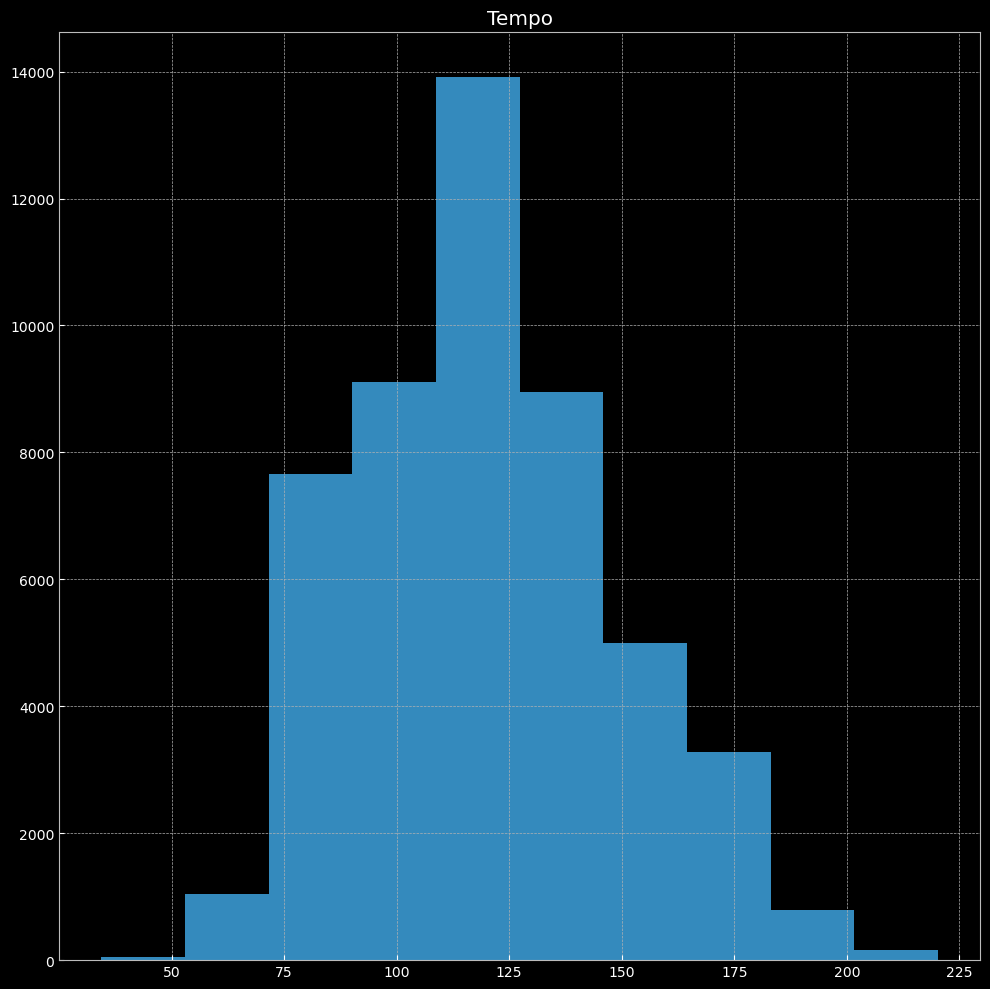

In [10]:
Tempo=data1.iloc[:,12]
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(Tempo, bins=None)
plt.title("Tempo")

In [42]:
train_data, val_data = model_selection.train_test_split(data1, test_size = 0.2) # 0.2 is 20% validation data.
#print(train_data)
#print(val_data)

In [46]:
X_train1 = train_data.drop('music_genre', axis = 1) 
X_val1  = val_data.drop('music_genre', axis = 1)
 
y_train1 = train_data['music_genre']
y_val1  = val_data['music_genre']

model1 = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model1.fit(X_train1, y_train1);

pred1=model1.predict_proba(X_val1)
auc1=metrics.roc_auc_score(y_val1, pred1, multi_class='ovr')
print(auc1)

pred_1=model1.predict(X_val1)
acc1=(y_val1 == pred_1).sum() / len(y_val1)
print(acc1)

0.7264718568628976
0.2743274327432743


Text(0.5, 1.0, 'Genre')

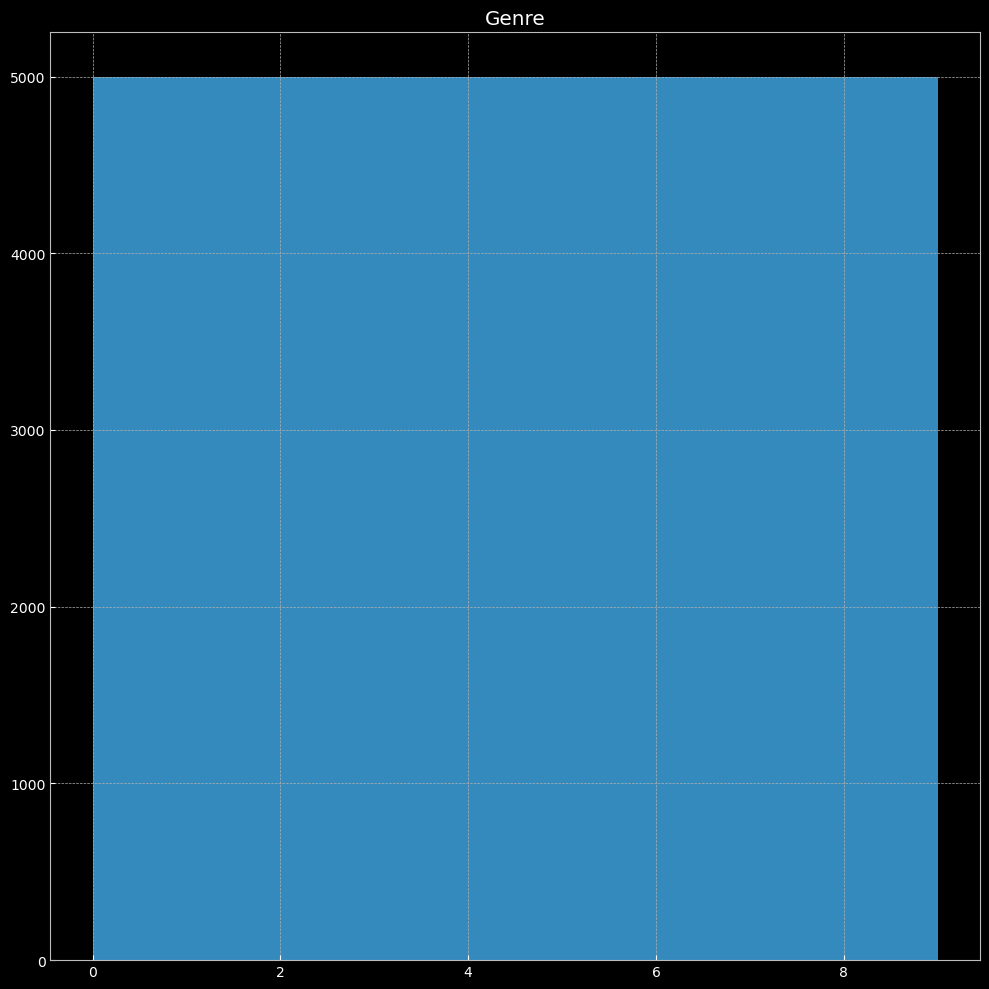

In [11]:
music_genre=data1.iloc[:,14]
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(music_genre, bins=None)
plt.title("Genre")

In [ ]:
#normalize columns

In [47]:
train_data.iloc[:,1]=stats.zscore(train_data.iloc[:,1])
val_data.iloc[:,1]=stats.zscore(val_data.iloc[:,1])
train_data.iloc[:,4]=stats.zscore(train_data.iloc[:,4])
val_data.iloc[:,4]=stats.zscore(val_data.iloc[:,4])
train_data.iloc[:,9]=stats.zscore(train_data.iloc[:,9])
val_data.iloc[:,9]=stats.zscore(val_data.iloc[:,9])
train_data.iloc[:,12]=stats.zscore(train_data.iloc[:,12])
val_data.iloc[:,12]=stats.zscore(val_data.iloc[:,12])

#print(train_data)
#print(val_data)

In [48]:
X_train = train_data.drop(['instance_id','music_genre'], axis = 1) 
X_val  = val_data.drop(['instance_id','music_genre'], axis = 1)

y_train = train_data['music_genre']
y_val  = val_data['music_genre']

print(X_train)

       popularity  acousticness  danceability  duration_ms  energy  \
17037    0.247390       0.63300         0.582    -0.529361   0.519   
5798    -2.843825       0.51800         0.562    -1.011200   0.408   
29858    0.633791       0.05870         0.688    -0.276409   0.715   
28975    1.342195       0.12600         0.805    -0.142355   0.867   
10075    0.182989       0.01750         0.693    -0.861520   0.699   
...           ...           ...           ...          ...     ...   
22814   -0.525414       0.26700         0.518    -0.508138   0.664   
30888    1.599796       0.24900         0.653    -0.258344   0.677   
9442    -0.911816       0.00164         0.467     0.332987   0.985   
20847   -0.461014       0.22600         0.677    -0.690073   0.830   
10858   -0.139012       0.00525         0.689     0.794321   0.739   

       instrumentalness  key  liveness  loudness  mode  speechiness     tempo  \
17037          0.000000  3.5    0.1010 -0.118810     0       0.3270  2.271721 

In [49]:
model2 = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model2.fit(X_train, y_train);

pred2=model2.predict_proba(X_val)
auc2=metrics.roc_auc_score(y_val, pred2, multi_class='ovr')
print(auc2)

pred_2=model2.predict(X_val)
acc1=(y_val == pred_2).sum() / len(y_val)
print(acc1)

0.8905823761473881
0.5151515151515151


In [138]:
#using t-sne/pca for dimensionality reduction,

In [50]:
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)

variance_explained=(eigen_vals[0]+eigen_vals[1])/sum(eigen_vals)
print(variance_explained)

[4.34825303 1.56244686 0.98057479 0.93664578 0.6931057  0.22975513
 0.07188908 0.05886677 0.05064295 0.02728164 0.02107158 0.00783619
 0.01090772]
0.6567971789999835


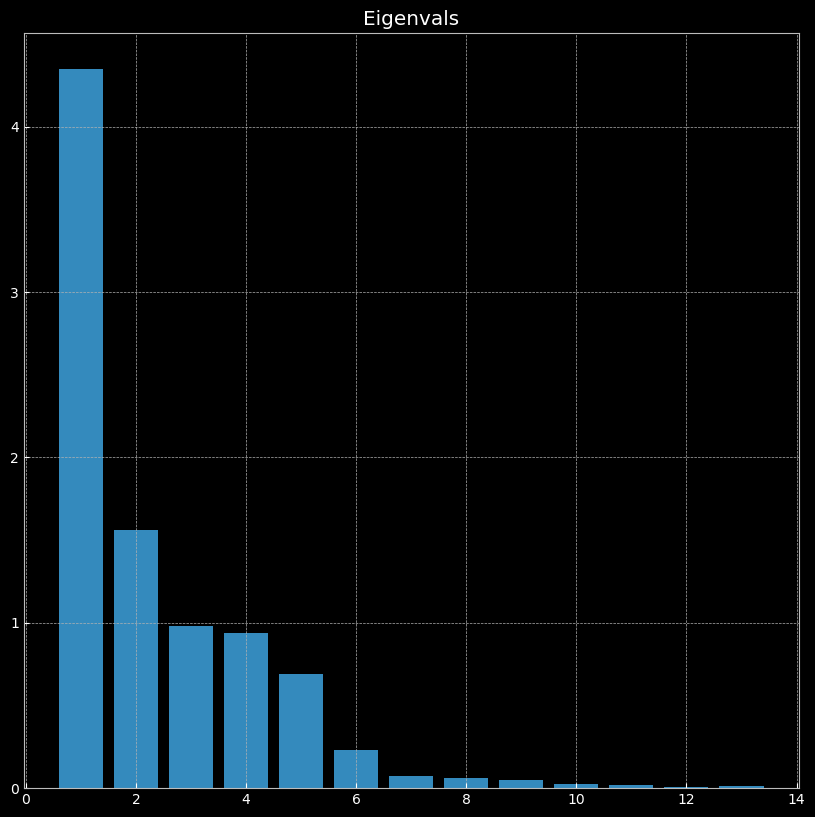

In [51]:
plt.bar(np.linspace(1,len(eigen_vals),len(eigen_vals)),eigen_vals)
plt.title('Eigenvals')
plt.show()

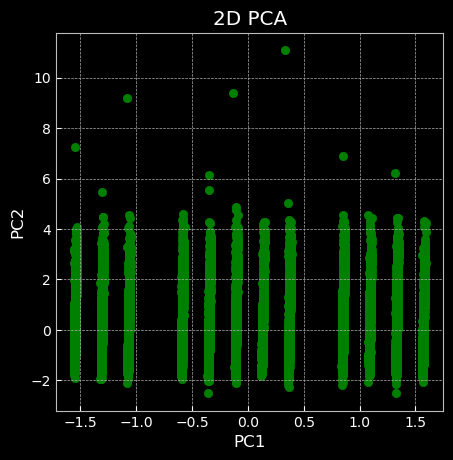

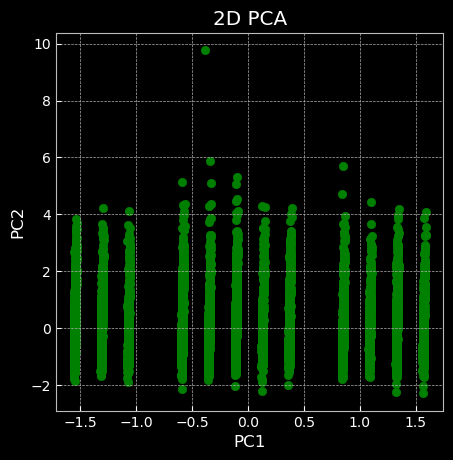

In [59]:
pca = PCA(n_components=5, whiten=True)
pca1 = PCA(n_components=5, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
pca1.fit(X_val)
X_val_pca=pca.transform(X_val)

plt.figure(figsize=(5, 5))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c='green')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA')
plt.show()

plt.figure(figsize=(5, 5))
plt.scatter(X_val_pca[:,0], X_val_pca[:,1], c='green')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA')
plt.show()

In [146]:
X_val_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000).fit_transform(X_val)
X_val_tsne.shape

D:\Aconda\envs\Lab1\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9999 samples in 0.044s...
[t-SNE] Computed neighbors for 9999 samples in 1.575s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9999
[t-SNE] Computed conditional probabilities for sample 2000 / 9999
[t-SNE] Computed conditional probabilities for sample 3000 / 9999
[t-SNE] Computed conditional probabilities for sample 4000 / 9999
[t-SNE] Computed conditional probabilities for sample 5000 / 9999
[t-SNE] Computed conditional probabilities for sample 6000 / 9999
[t-SNE] Computed conditional probabilities for sample 7000 / 9999
[t-SNE] Computed conditional probabilities for sample 8000 / 9999
[t-SNE] Computed conditional probabilities for sample 9000 / 9999
[t-SNE] Computed conditional probabilities for sample 9999 / 9999
[t-SNE] Mean sigma: 0.510569
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.167542
[t-SNE] KL divergence after 1000 iterations: 1.667736


(9999, 2)

In [49]:
X_train_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000).fit_transform(X_train)
X_train_tsne.shape

D:\Aconda\envs\Lab1\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 39996 samples in 0.210s...
[t-SNE] Computed neighbors for 39996 samples in 14.518s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39996
[t-SNE] Computed conditional probabilities for sample 2000 / 39996
[t-SNE] Computed conditional probabilities for sample 3000 / 39996
[t-SNE] Computed conditional probabilities for sample 4000 / 39996
[t-SNE] Computed conditional probabilities for sample 5000 / 39996
[t-SNE] Computed conditional probabilities for sample 6000 / 39996
[t-SNE] Computed conditional probabilities for sample 7000 / 39996
[t-SNE] Computed conditional probabilities for sample 8000 / 39996
[t-SNE] Computed conditional probabilities for sample 9000 / 39996
[t-SNE] Computed conditional probabilities for sample 10000 / 39996
[t-SNE] Computed conditional probabilities for sample 11000 / 39996
[t-SNE] Computed conditional probabilities for sample 12000 / 39996
[t-SNE] Computed conditional probabilities for s

(39996, 2)

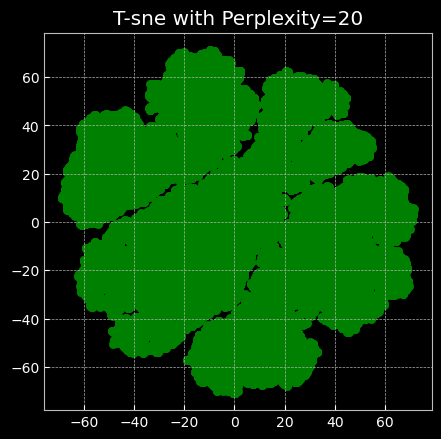

In [42]:
plt.figure(figsize=(5, 5))
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c='green')
plt.title('T-sne with Perplexity=20')
plt.show()

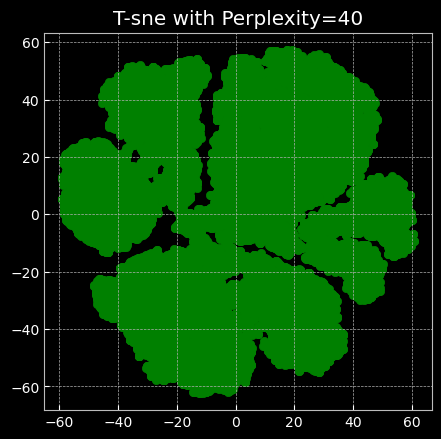

In [46]:
plt.figure(figsize=(5, 5))
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c='green')
plt.title('T-sne with Perplexity=40')
plt.show()

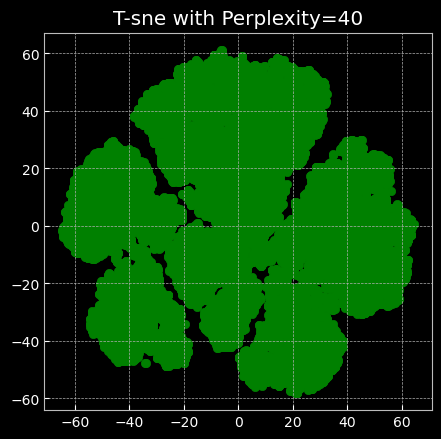

In [50]:
plt.figure(figsize=(5, 5))
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c='green')
plt.title('T-sne with Perplexity=40')
plt.show()

In [56]:
range_n_clusters = [4, 5, 6, 7, 8, 9, 10, 11, 12]
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=14747471)
    cluster_labels = clusterer.fit_predict(X_train_tsne)
    silhouette_avg = silhouette_score(X_train_tsne, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
        )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_tsne, cluster_labels)

For n_clusters = 4 The average silhouette_score is : 0.40313205
For n_clusters = 5 The average silhouette_score is : 0.3926008
For n_clusters = 6 The average silhouette_score is : 0.41183445
For n_clusters = 7 The average silhouette_score is : 0.41091493
For n_clusters = 8 The average silhouette_score is : 0.40059152
For n_clusters = 9 The average silhouette_score is : 0.40700802
For n_clusters = 10 The average silhouette_score is : 0.4113117
For n_clusters = 11 The average silhouette_score is : 0.40308523
For n_clusters = 12 The average silhouette_score is : 0.39362893


In [60]:
print(X_train_pca)

[[ 0.12862641 -0.6998466   1.78323896 -0.84159539  1.1821602 ]
 [ 0.86183145  0.79283042  0.93046097 -1.84803026 -2.42121416]
 [ 1.57099247 -0.95654779  0.45030732 -0.02505082  0.31131918]
 ...
 [-0.10480901 -0.79116437  2.52225392 -0.05893123 -0.93427683]
 [-1.06403422 -0.53818462  0.00817558 -0.58712379 -1.13640743]
 [-1.31276169 -0.22583215  0.78667898  0.75116292 -0.41806136]]


In [62]:
X_train_pca_df=pd.DataFrame(X_train_pca,columns=['x','y','a','b','c'])
print(X_train_pca_df['x'])

0        0.128626
1        0.861831
2        1.570992
3       -0.109533
4       -0.345168
           ...   
39991   -0.103929
39992   -0.587191
39993   -0.104809
39994   -1.064034
39995   -1.312762
Name: x, Length: 39996, dtype: float64


In [ ]:
range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=14747471)
    cluster_labels = clusterer.fit_predict(X_train_pca_df['x'])
    silhouette_avg = silhouette_score(X_train_pca_df['x'], cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
        )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train_pca[:,0], cluster_labels)

For n_clusters = 3 The average silhouette_score is : 0.19507347224295538
For n_clusters = 4 The average silhouette_score is : 0.18264084751009288
For n_clusters = 5 The average silhouette_score is : 0.1958096630016474


In [55]:
X_train_pca_df=pd.DataFrame(X_train_pca,columns=['x','y'])
X_val_pca_df=pd.DataFrame(X_val_pca,columns=['q','w'])

clusterer = KMeans(n_clusters=12, random_state=14747471)
train_labels = clusterer.fit_predict(X_train_pca_df[['x']])
X_train_pca_clstrs = X_train_pca_df.copy()
X_train_pca_clstrs['clusters'] = train_labels

val_labels=clusterer.predict(X_val_pca_df[['q']])
X_val_pca_clstrs = X_val_pca_df.copy()
X_val_pca_clstrs['clusters'] = val_labels

print(X_train_pca_clstrs)
print(X_val_pca_clstrs)
print(y_train)
print(y_val)

D:\Aconda\envs\Lab1\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- q
Feature names seen at fit time, yet now missing:
- x

  warnings.warn(message, FutureWarning)


              x         y  clusters
0      0.128626 -0.699847        11
1      0.861831  0.792830         3
2      1.570992 -0.956548         0
3     -0.109533 -1.195332         7
4     -0.345168 -0.338445         2
...         ...       ...       ...
39991 -0.103929 -0.065567         7
39992 -0.587191 -0.213806         6
39993 -0.104809 -0.791164         7
39994 -1.064034 -0.538185         1
39995 -1.312762 -0.225832         9

[39996 rows x 3 columns]
             q         w  clusters
0     1.337054  0.269742         8
1     1.575599 -0.011792         0
2    -0.579577  2.320070         6
3    -0.587287 -0.818423         6
4     1.345275  3.975748         8
...        ...       ...       ...
9994 -0.107467 -0.419779         7
9995  0.125740 -0.130407        11
9996  0.858279  2.006681         3
9997 -1.069961 -0.017107         1
9998  0.861167  2.317540         3

[9999 rows x 3 columns]
17037    3.0
5798     1.0
29858    5.0
28975    5.0
10075    2.0
        ... 
22814    4.0
30888 

In [57]:
model1 = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model1.fit(X_train_pca_clstrs[['clusters']],y_train);

pred1=model1.predict_proba(X_val_pca_clstrs[['clusters']])
auc1=metrics.roc_auc_score(y_val, pred1, multi_class='ovr')
print(auc1)

pred_1=model1.predict(X_val_pca_clstrs[['clusters']])
acc1=(y_val == pred_1).sum() / len(y_val)
print(acc1)

0.5193340266069643
0.11181118111811181


In [58]:
model1 = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model1.fit(X_train_pca, y_train);

pred1=model1.predict_proba(X_val_pca)
auc1=metrics.roc_auc_score(y_val, pred1, multi_class='ovr')
print(auc1)


pred_1=model1.predict(X_val_pca)
acc1=(y_val == pred_1).sum() / len(y_val)
print(acc1)

0.7400545225587406
0.2516251625162516


In [173]:
model1 = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model1.fit(X_train_pca_clstrs, y_train);

pred1=model1.predict_proba(X_val_pca_clstrs)
auc1=metrics.roc_auc_score(y_val, pred1, multi_class='ovr')
print(auc1)


pred_1=model1.predict(X_val_pca_clstrs)
acc1=(y_val == pred_1).sum() / len(y_val)
print(acc1)

0.7440375209034935
0.24422442244224424


D:\Aconda\envs\Lab1\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- q
- w
Feature names seen at fit time, yet now missing:
- x
- y

  warnings.warn(message, FutureWarning)
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- q
- w
Feature names seen at fit time, yet now missing:
- x
- y

  warnings.warn(message, FutureWarning)


In [176]:
svm = LinearSVC()
clf = CalibratedClassifierCV(svm) 
clf.fit(X_train_pca, y_train)

y_pred3 = clf.predict_proba(X_val_pca)
auc3=metrics.roc_auc_score(y_val, y_pred3, multi_class='ovo')
print(auc3)

pred_3=clf.predict(X_val_pca)
acc3=(y_val == pred_3).sum() / len(y_val)
print(acc3)

D:\Aconda\envs\Lab1\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7450697552463852
0.24222422242224223


In [178]:
svm = LinearSVC()
clf = CalibratedClassifierCV(svm) 
clf.fit(X_train_pca_clstrs, y_train)


y_pred3 = clf.predict_proba(X_val_pca_clstrs)
auc3=metrics.roc_auc_score(y_val, y_pred3, multi_class='ovo')
print(auc3)

pred_3=clf.predict(X_val_pca_clstrs)
acc3=(y_val == pred_3).sum() / len(y_val)
print(acc3)

D:\Aconda\envs\Lab1\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an 

0.7443944317476556
0.24282428242824283


D:\Aconda\envs\Lab1\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- q
- w
Feature names seen at fit time, yet now missing:
- x
- y

  warnings.warn(message, FutureWarning)
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- q
- w
Feature names seen at fit time, yet now missing:
- x
- y

  warnings.warn(message, FutureWarning)
D:\Aconda\envs\Lab1\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- q
- w
Feature names seen at fit time, yet now missing:
- x
- y

  warnings.warn(message, FutureWarning)
D:\Aconda\envs\Lab1

In [206]:
print(pd.DataFrame(y_train))

       music_genre
13948            2
23977            4
28348            5
49092            9
46904            9
...            ...
42480            8
32150            6
41732            8
23904            4
24565            4

[39996 rows x 1 columns]


In [231]:
train_clusters = X_train_pca_clstrs.copy()
test_clusters = X_val_pca_clstrs.copy()

train_clusters['z']= y_train[0]
train_clusters.iloc[1,3]=y_train[2]
test_clusters['z1'] = y_val
# locate the "0" cluster
train_0 = train_clusters.loc[train_clusters.clusters < 0.5] # after scaling, 0 went negtive
test_0 = test_clusters.loc[test_clusters.clusters < 0.5]
y_train_0 = train_0.z.values
y_test_0 = test_0.z1.values

print(y_train[6])
print(train_clusters)

0
              x         y  clusters  z
0     -0.350017 -0.627834         1  0
1     -1.308412 -0.883442         6  0
2      0.862491  0.267150         0  0
3     -0.351234  0.265534         1  0
4      0.361784 -0.753914         4  0
...         ...       ...       ... ..
39991  0.853573  0.073611         0  0
39992  0.856417  0.326279         0  0
39993 -0.102595  0.363172         7  0
39994  1.331317 -0.692636         3  0
39995 -0.108632 -0.496576         7  0

[39996 rows x 4 columns]


In [ ]:
clf1 = RandomForestClassifier(n_estimators=100, max_samples=1.0, max_features=0.5,bootstrap=True, criterion='gini')
clf1.fit(X_train,y_train)

y_pred3 = clf.predict_proba(X_val_pca_clstrs)
auc3=metrics.roc_auc_score(y_val, y_pred3, multi_class='ovo')
print(auc3)

pred_3=clf.predict(X_val_pca_clstrs)
acc3=(y_val == pred_3).sum() / len(y_val)
print(acc3)